<a href="https://colab.research.google.com/github/pragtishukla265/NLPCSET546/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
with open('/content/brown1.txt', 'r') as f:
  file_contents = f.read()

print(file_contents)

A01 0010    The Fulton County Grand Jury said Friday an investigation
A01 0020 of Atlanta's recent primary election produced "no evidence" that
A01 0030 any irregularities took place.   The jury further said in term-end
A01 0040 presentments that the City Executive Committee, which had over-all
A01 0050 charge of the election, "deserves the praise and thanks of the
A01 0060 City of Atlanta" for the manner in which the election was conducted.
A01 0070    The September-October term jury had been charged by Fulton
A01 0080 Superior Court Judge Durwood Pye to investigate reports of possible
A01 0090 "irregularities" in the hard-fought primary which was won by
A01 0100 Mayor-nominate Ivan Allen Jr&.   "Only a relative handful
A01 0110 of such reports was received", the jury said, "considering the
A01 0120 widespread interest in the election, the number of voters and the size
A01 0130 of this city".   The jury said it did find that many of Georgia's
A01 0140 registration and election laws "a

In [ ]:
import pandas as pd
import nltk

nltk.download('punkt')

df = pd.read_csv('/content/brown1.txt', sep='\t', header=None)

df_string = df.to_string(index=False, header=False)

tokens = nltk.word_tokenize(df_string)

print(tokens[:20])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['A01', '0010', 'The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'A01', '0020', 'of', 'Atlanta', "'s", 'recent', 'primary', 'election', 'produced']


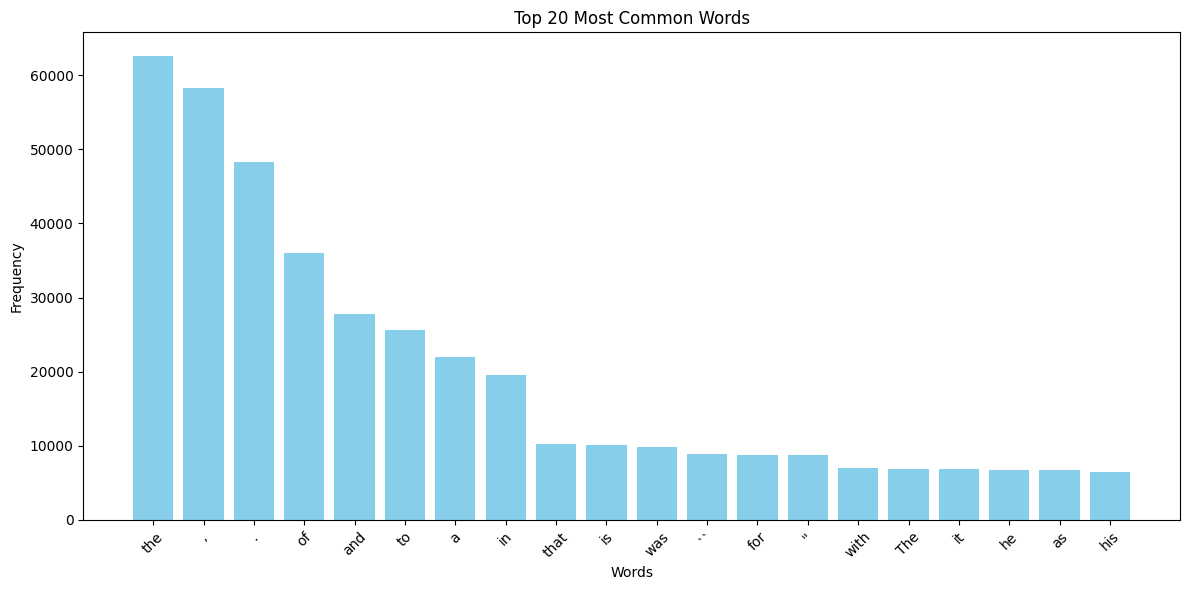

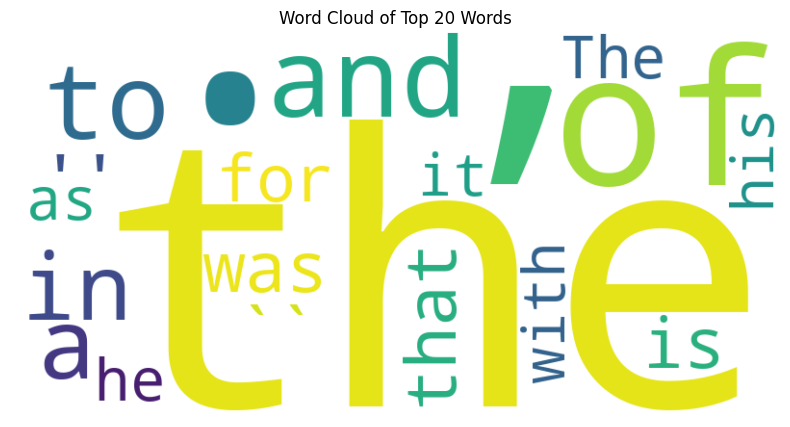

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


word_freq = Counter(tokens)


top20 = word_freq.most_common(20)
words20, counts20 = zip(*top20)  # unzip words and counts

# Plot a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.bar(words20, counts20, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate a word cloud for the top 20 words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(dict(top20))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 20 Words')
plt.show()

In [ ]:
from nltk.stem import PorterStemmer
from collections import Counter

# Assuming 'tokens' is your list of tokenized words from the previous steps

# Initialize the PorterStemmer
ps = PorterStemmer()

# Apply stemming to each token
stemmed_tokens = [ps.stem(word) for word in tokens]

# Count the frequency of each stemmed word
stemmed_freq = Counter(stemmed_tokens)

# Print the 15 most common stemmed words with their frequencies
print("Stemmed Word  |  Frequency")
print("---------------------------")
for word, freq in stemmed_freq.most_common(15):
    print(f"{word:12} | {freq}")

Stemmed Word  |  Frequency
---------------------------
the          | 69924
,            | 58328
.            | 48339
of           | 36407
and          | 28834
to           | 26095
a            | 23370
in           | 21335
it           | 10900
that         | 10773
is           | 10191
wa           | 9962
he           | 9793
for          | 9484
``           | 8836


In [ ]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk

# Download required resources for lemmatization (run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Assuming 'tokens' is your list of tokenized words from previous steps

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each token (convert to lowercase for normalization)
lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

# Count the frequency of each lemmatized word
lemmatized_freq = Counter(lemmatized_tokens)

# Print the 15 most common lemmatized words with their frequencies
print("Lemmatized Word  |  Frequency")
print("------------------------------")
for word, freq in lemmatized_freq.most_common(15):
    print(f"{word:15} | {freq}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lemmatized Word  |  Frequency
------------------------------
the             | 69924
,               | 58328
.               | 48339
of              | 36406
a               | 30619
and             | 28834
to              | 26095
in              | 21335
it              | 10900
that            | 10773
is              | 10191
wa              | 9962
he              | 9793
for             | 9484
``              | 8836


In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Initialize stemmer and lemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Sample list of common words to compare stemming and lemmatization
sample_words = ['is', 'was', 'are', 'be', 'run', 'running', 'ate', 'eaten',
                'cats', 'children', 'better', 'mice', 'playing', 'walks', 'dogs']

# Print header for comparison table
print("Word       | Stemmed   | Lemmatized")
print("-------------------------------------")

# For each word, print its stemmed and lemmatized forms side-by-side
for word in sample_words:
    stemmed_word = ps.stem(word)
    lemmatized_word = lemmatizer.lemmatize(word)
    print(f"{word:10} | {stemmed_word:9} | {lemmatized_word}")


Word       | Stemmed   | Lemmatized
-------------------------------------
is         | is        | is
was        | wa        | wa
are        | are       | are
be         | be        | be
run        | run       | run
running    | run       | running
ate        | ate       | ate
eaten      | eaten     | eaten
cats       | cat       | cat
children   | children  | child
better     | better    | better
mice       | mice      | mouse
playing    | play      | playing
walks      | walk      | walk
dogs       | dog       | dog
